In [1]:
########## Calling relevant libraries ##########
%matplotlib inline
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy

# Setting matplotlib options for this notebook
import matplotlib
from matplotlib import pyplot as plt

import tensorflow as tf

import sklearn
from sklearn.externals import joblib

import neuravi

/Users/charles/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charles/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
d = neuravi.Data("./data/")

/Users/charles/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
import rampy as rp

# parameters for neural net
prm_nn = dict(hidden_layer_sizes=(10,5,),solver = 'lbfgs',activation='relu',
              early_stopping=True,
              random_state = 42)
param_b = dict(n_estimators=10, max_samples=1.0, max_features=1.0, 
               bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, verbose=0)


# REQUIRES RAMPY v0.4
mod = rp.mlregressor(d.X_train, d.y_train, 
                     X_test=d.X_test, y_test=d.y_test, 
                     algorithm="BaggingNeuralNet",
                     scaler = "StandardScaler",
                     param_neurons=prm_nn,
                     param_bagging=param_b,rand_state=100)

mod.fit()

In [4]:
MSE_NN_train = np.sqrt(mean_squared_error(mod.y_train, mod.prediction_train))
MSE_NN_test = np.sqrt(mean_squared_error(mod.y_test, mod.prediction_test))

print("training and testing RMSE with neural nets")
print(MSE_NN_train)
print(MSE_NN_test)


training and testing RMSE with neural nets
0.4324375747178814
0.4774036988369504


(-3, 15)

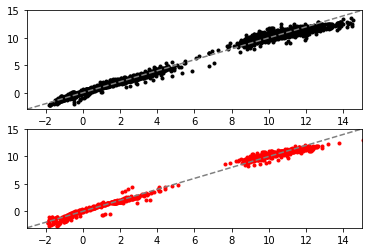

In [5]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(mod.y_train, mod.prediction_train,"k.")

plt.plot([-3,15],[-3,15],"--",color="grey")

plt.xlim(-3,15)
plt.ylim(-3,15)

plt.subplot(2,1,2)
plt.plot(mod.y_test, mod.prediction_test,"r.")

plt.plot([-3,15],[-3,15],"--",color="grey")

plt.xlim(-3,15)
plt.ylim(-3,15)

This example with scikit-learn directly relates the melt composition and temperature to it's viscosity.

The problem with this approach is that it underuses our knowledge of how viscosity and temperature vary.

This creates too much noise when predicting viscosity over T for one composition.

Illustration with the silica glass:

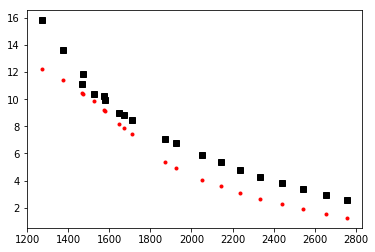

In [7]:
ex_input = d.X_train[d.X_train[:,0]==100.,:]
ex_y = d.y_train[d.X_train[:,0]==100.]
ex_pred = mod.predict(ex_input)

plt.plot(ex_input[:,14],ex_y,"ks")
plt.plot(ex_input[:,14],ex_pred,"r.")

The predictions in red take a sort of sigmoidal shape which does not fit with the expected curvature observed in the data.

The solution to this problem is to fit not the viscosity directly, but the parameters of a viscosity equation with a neural net.

See the notebook Tensorflow_train for the example.